# Test Hydra Config

In [1]:
# Load Hydra config in notebooks
# https://github.com/facebookresearch/hydra/blob/main/examples/jupyter_notebooks/compose_configs_in_notebook.ipynb
import os
from hydra import initialize_config_dir, compose
import hydra
from omegaconf import OmegaConf

abs_config_dir = os.path.abspath("config/")

In [7]:

with initialize_config_dir(version_base=None, config_dir=abs_config_dir):
    config = compose(config_name="main.yaml", overrides=[])
    # print(OmegaConf.to_yaml(env_config))
    print(config)

dataset = hydra.utils.instantiate(
    config.dataset,
    float_precision=config.float_precision,
)

oracle = hydra.utils.instantiate(
    config.oracle,
    device=config.device,
    float_precision=config.float_precision,
)

filter = hydra.utils.instantiate(
    config.filter,
    oracle=oracle,
)

surrogate = hydra.utils.instantiate(
    config.surrogate,
    device=config.device,
    float_precision=config.float_precision,
    maximize=config.maximize,
)

sampler = hydra.utils.instantiate(
    config.sampler,
    surrogate=surrogate,
)
sampler

{'device': 'cuda', 'float_precision': 64, 'budget': 5, 'n_samples': 3, 'seed': 31415, 'maximize': False, 'dataset': {'_target_': 'dataset.dataset.BraninDatasetHandler', 'grid_size': 10, 'normalize_scores': True, 'train_fraction': 1.0, 'batch_size': 16, 'shuffle': True, 'train_path': 'storage/branin/data_10_train.csv', 'test_path': None}, 'oracle': {'_target_': 'gflownet.proxy.box.branin.Branin', 'fidelity': '1,', 'do_domain_map': True}, 'filter': {'_target_': 'filter.filter.Filter'}, 'logger': {'_target_': 'utils.logger.Logger', 'do': {'online': True, 'times': True}, 'project_name': 'MF-AL-GFN', 'train': {'period': 1}, 'test': {'first_it': True, 'period': 100, 'n': 100, 'kde': {'bandwidth': 0.1, 'kernel': 'gaussian'}, 'n_top_k': 5000, 'top_k': 100, 'top_k_period': -1, 'n_trajs_logprobs': 10, 'logprobs_batch_size': 100, 'logprobs_bootstrap_size': 10000, 'max_data_logprobs': 100000.0}, 'oracle': {'period': 100000, 'k': [1, 10, 100]}, 'context': '0', 'notes': None, 'ckpts': {'policy': {'p

# Active Learning Loop

In [2]:
# Load Hydra config in notebooks
# https://github.com/facebookresearch/hydra/blob/main/examples/jupyter_notebooks/compose_configs_in_notebook.ipynb
import os
from hydra import initialize_config_dir, compose
import hydra
from omegaconf import OmegaConf
abs_config_dir = os.path.abspath("config/")

with initialize_config_dir(version_base=None, config_dir=abs_config_dir):
    config = compose(config_name="test_branin.yaml", overrides=[])
    print(OmegaConf.to_yaml(config))
    print(config)

config.sampler.conf.logger.do.online = False

dataset:
  grid_size: 100
  normalize_scores: true
  train_fraction: 1.0
  batch_size: 16
  shuffle: true
  train_path: ~/activelearning/my_package/storage/branin/data_100_train.csv
  test_path: null
  _target_: dataset.grid.BraninDatasetHandler
oracle:
  _target_: oracle.oracle.Branin
  fidelity: 1
  do_domain_map: true
filter:
  _target_: filter.filter.ScoreFilter
sampler:
  _target_: my_package.sampler.sampler.RandomSampler
  conf:
    agent:
      random_action_prob: 0.0
      optimizer:
        lr: 0.0005
        n_train_steps: 5000
    logger:
      do:
        online: true
      project_name: test_gflownet
      run_name: identity_lr5e-4
    env:
      length: 100
      cell_min: 0
      cell_max: 0.99
      reward_func: power
      reward_min: 1.0e-08
      reward_beta: 1.0
      reward_norm: 1.0
surrogate:
  _target_: surrogate.surrogate.SingleTaskGPRegressor
user:
  logdir:
    root: activelearning/logs
  data:
    root: activelearning/data
device: cpu
float_precision: 32
bud

/home/mila/c/christina.humer/.conda/envs/al_new/lib/python3.10/site-packages/hydra/_internal/defaults_list.py:251: UserWarning: In 'test_branin.yaml': Defaults list is missing `_self_`. See https://hydra.cc/docs/1.2/upgrades/1.0_to_1.1/default_composition_order for more information
  warnings.warn(msg, UserWarning)


In [3]:
import torch
# device = "cuda" if torch.cuda.is_available() else "cpu"
device = config.device
n_iterations = config.budget  # TODO: replace with budget
grid_size = config.dataset.grid_size
n_samples = config.n_samples
maximize = config.maximize

from gflownet.utils.common import set_float_precision
float_prec = set_float_precision(config.float_precision)

import matplotlib.colors as cm
import matplotlib.pyplot as plt
# colors = ["red", "blue", "green", "orange", "brown", "pink"]
colors = plt.get_cmap("Reds")

In [4]:
from utils.logger import WandBLogger
# logger = WandBLogger(project_name="test_plotting", run_name="Greedy 100x100 acqfilter")

from utils.plotter import PlotHelper
# plotter = PlotHelper(logger)
plotter = PlotHelper()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: christina-humer. Use `wandb login --relogin` to force relogin


wandb: ERROR Error while calling W&B API: run wa4w48xc was previously created and deleted; try a new run name (<Response [409]>)
wandb: ERROR Error while calling W&B API: run wa4w48xc was previously created and deleted; try a new run name (<Response [409]>)
wandb: ERROR Error while calling W&B API: run wa4w48xc was previously created and deleted; try a new run name (<Response [409]>)
wandb: ERROR Error while calling W&B API: run wa4w48xc was previously created and deleted; try a new run name (<Response [409]>)


/home/mila/c/christina.humer/.conda/envs/al_new/lib/python3.10/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)
/home/mila/c/christina.humer/.conda/envs/al_new/lib/python3.10/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)
/home/mila/c/christina.humer/.conda/envs/al_new/lib/python3.10/site-packages/botorch/models/gp_regression.

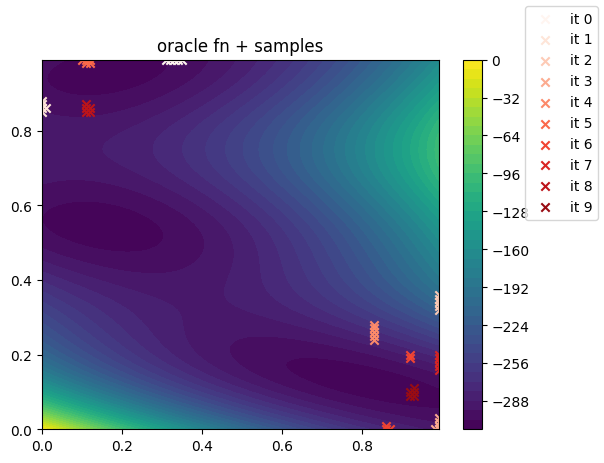

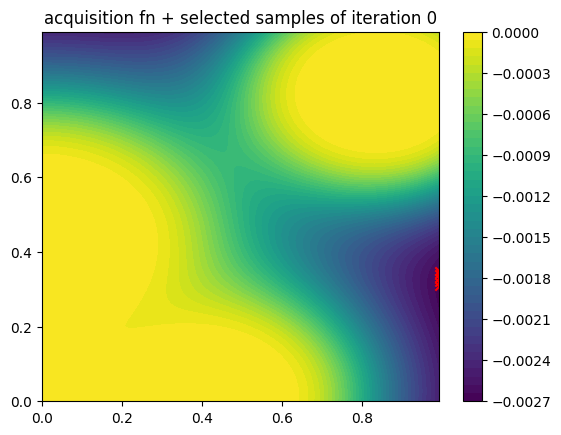

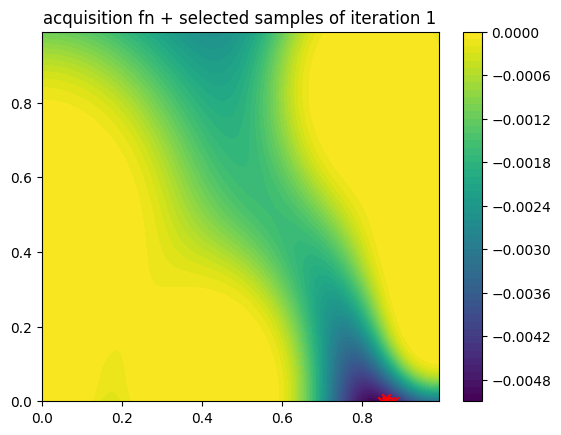

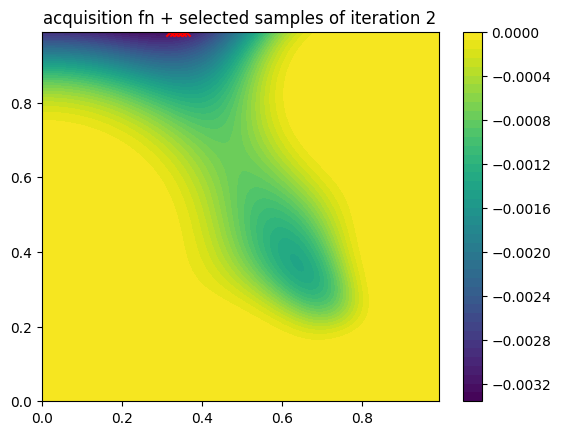

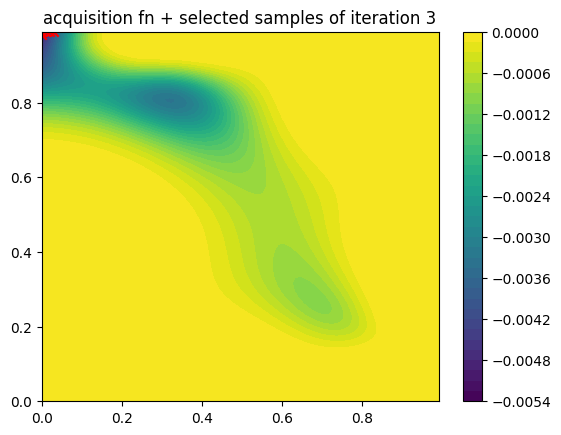

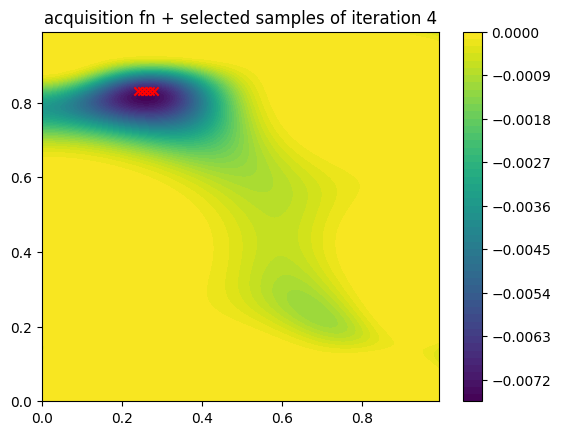

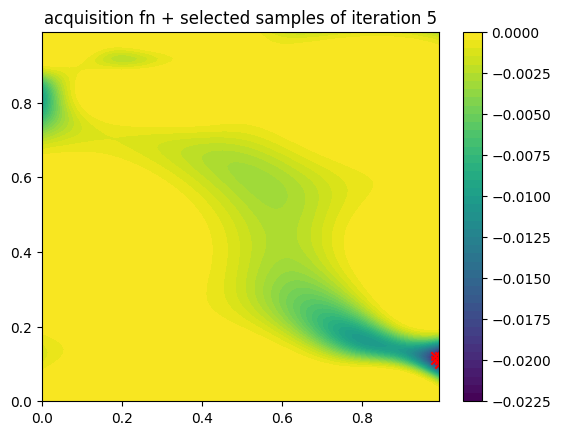

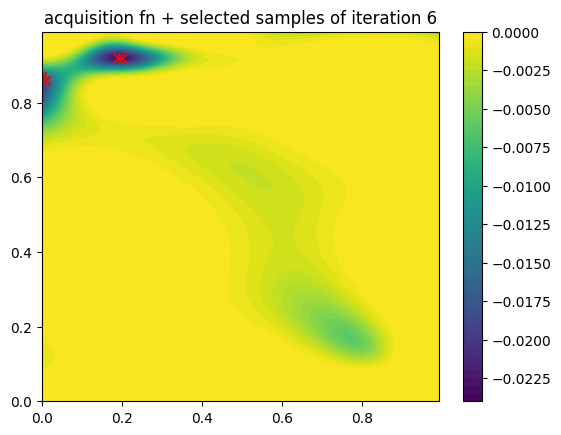

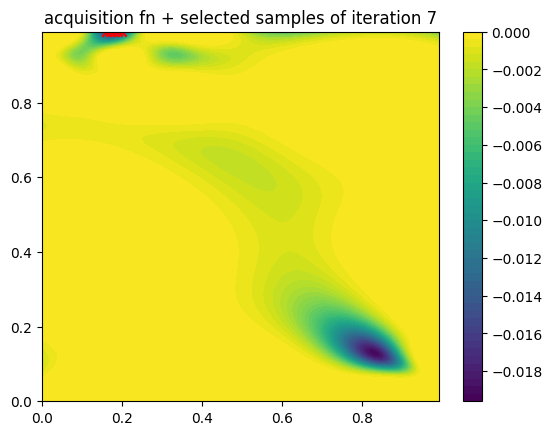

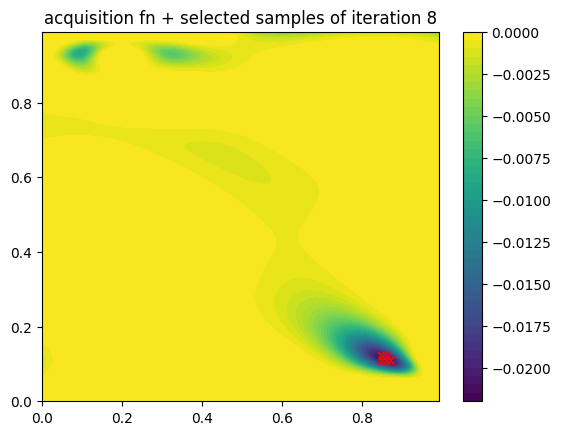

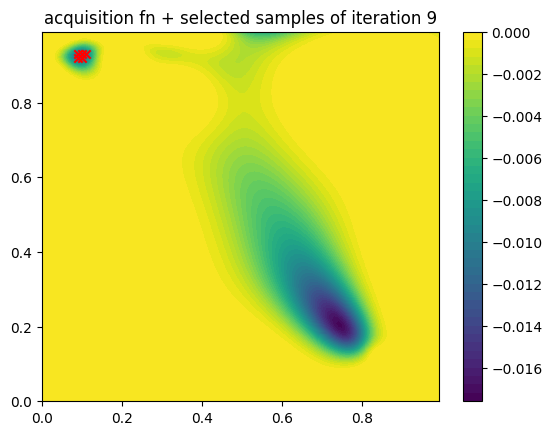

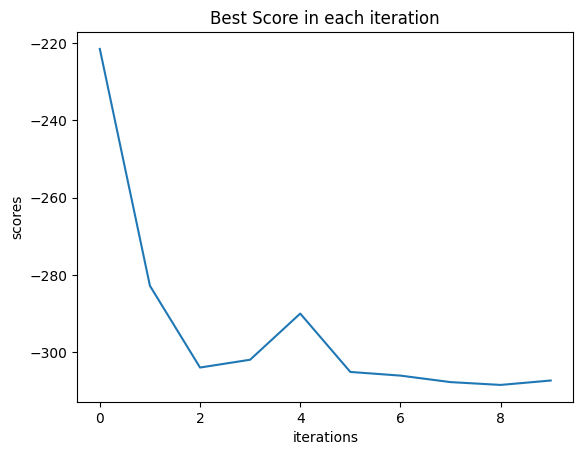

wandb: ERROR Error while calling W&B API: run wa4w48xc was previously created and deleted; try a new run name (<Response [409]>)


In [5]:
from dataset.grid import BraninDatasetHandler
from surrogate.surrogate import SingleTaskGPRegressor
from sampler.sampler import GreedySampler, RandomSampler
from filter.filter import Filter, ScoreFilter
from oracle.oracle import BraninOracle


# Dataset
dataset_handler = BraninDatasetHandler(
    grid_size=grid_size,
    train_path="./storage/branin/data_%i_train.csv" % grid_size,
    train_fraction=1.0,
    float_precision=float_prec,
)

candidate_set, xi, yi = dataset_handler.get_candidate_set()

# Oracle
oracle = BraninOracle(
    fidelity=1, do_domain_map=True, device=device, float_precision=float_prec
)

if plotter is not None:
    fig_oracle, ax_oracle = plotter.plot_function(oracle, candidate_set.clone().to(device), xi=xi, yi=yi)


best_scores = []

for i in range(n_iterations):

    train_data, test_data = dataset_handler.get_dataloader()
    # print("iteration", i)
    # Surrogate (e.g., Bayesian Optimization)
    # starts with a clean slate each iteration
    surrogate = SingleTaskGPRegressor(
        float_precision=float_prec, device=device, maximize=maximize
    )
    surrogate.fit(train_data)


    # Sampler (e.g., GFlowNet, or Random Sampler)
    # also starts with a clean slate; TODO: experiment with NOT training from scratch
    # sampler = RandomSampler(surrogate)
    sampler = GreedySampler(
        surrogate,
        device=device,
        float_precision=float_prec,
    )
    # sampler = hydra.utils.instantiate(
    #     config.sampler,
    #     surrogate=surrogate,
    #     device=device,
    #     float_precision=float_prec,
    #     _recursive_=False,
    # )

    sampler.fit()  # only necessary for samplers that train a model

    samples = sampler.get_samples(
        n_samples * 5, candidate_set=candidate_set#.clone().to(device)
    )
    
    if plotter is not None and hasattr(sampler, "sampler"):
        def reward_fn(samples):
            return sampler.sampler.env.proxy2reward(sampler.sampler.env.proxy(samples))
        fig_reward, ax_reward = plotter.plot_function(reward_fn, candidate_set.clone().to(device), xi=xi, yi=yi)
        fig_reward, ax_reward = plotter.plot_samples(samples, ax_reward, fig_reward)
        ax_reward.set_title("reward fn + proposed samples of iteration %i"%i)
        plotter.log_figure(fig_reward, "reward")

    # Filter
    # filter = Filter()
    filter = ScoreFilter(surrogate.get_acquisition_values)
    filtered_samples = filter(
        n_samples=n_samples, candidate_set=samples.clone()
    )
    
    if plotter is not None:
        fig_acq, ax_acq = plotter.plot_function(surrogate, candidate_set.clone().to(device), xi=xi, yi=yi)
        fig_acq, ax_acq = plotter.plot_samples(filtered_samples, ax_acq, fig_acq)
        ax_acq.set_title("acquisition fn + selected samples of iteration %i"%i)
        plotter.log_figure(fig_acq, "acq")
    

    if plotter is not None:
        ax_oracle.scatter(
            x=filtered_samples[:, 0].cpu(),
            y=filtered_samples[:, 1].cpu(),
            c=cm.to_hex(colors(i / n_iterations)),
            marker="x",
            label="it %i" % i,
        )

    scores = oracle(filtered_samples.clone())
    dataset_handler.update_dataset(filtered_samples.cpu(), scores.cpu())
    best_scores.append(scores.min().cpu())
    if logger is not None:
        logger.log_metric(scores.min().cpu(), "best_score")

if ax_oracle is not None:
    fig_oracle.legend()
    ax_oracle.set_title("oracle fn + samples")
    plotter.log_figure(fig_oracle, key="oracle")


fig = plt.figure()
plt.plot(best_scores)
plt.xlabel("iterations")
plt.ylabel("scores")
plt.title("Best Score in each iteration")
if plotter is not None:
    plotter.log_figure(fig, key="best_scores")


# Test individual components

In [2]:
import os

# os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
# device = "cpu"
print(device)


from gflownet.utils.common import set_float_precision
float_prec = set_float_precision(64)
# float_prec = torch.double

import numpy as np
grid_size = 10  # 100
test_states = torch.tensor([[0.5, 0.5]])
test_scores = torch.tensor([-150.0])
n_samples = 5

baseline_states = torch.tensor(
    [
        [0.0 * grid_size, 0.0 * grid_size],
        [0.0 * grid_size, 0.4 * grid_size],
        [0.4 * grid_size, 0.0 * grid_size],
        [0.8 * grid_size, 0.8 * grid_size],
    ]
)

# define grid space
xi = np.arange(0, 1, 1 / grid_size)
yi = np.arange(0, 1, 1 / grid_size)
grid = np.array(np.meshgrid(xi, yi))
grid_flat = torch.tensor(grid.T, dtype=float_prec).reshape(-1, 2).to(device)

cuda


In [3]:
# dataset
from dataset.dataset import BraninDatasetHandler

dataset_handler = BraninDatasetHandler(
    grid_size=grid_size,
    train_path="./storage/branin/data_%i_train.csv" % grid_size,
    train_fraction=1.0,
    float_precision=float_prec,
)

# testing dataset
dataset_handler.update_dataset(test_states, test_scores)
print(dataset_handler.train_data.X_data, dataset_handler.train_data.y_data)
print(dataset_handler.train_data[:])
train_loader, test_loader = dataset_handler.get_dataloader()
for X, y in train_loader:
    print(X, y)

tensor([[0., 0.],
        [0., 4.],
        [4., 0.],
        [8., 8.],
        [5., 5.]], dtype=torch.float64) tensor([  -0.8709, -171.1192, -273.2218, -174.8874, -150.0000],
       dtype=torch.float64)
(tensor([[0.0000, 0.0000],
        [0.0000, 0.4000],
        [0.4000, 0.0000],
        [0.8000, 0.8000],
        [0.5000, 0.5000]], dtype=torch.float64), tensor([1.0000, 0.3749, 0.0000, 0.3611, 0.4524], dtype=torch.float64))
tensor([[0.4000, 0.0000],
        [0.0000, 0.0000],
        [0.0000, 0.4000],
        [0.5000, 0.5000],
        [0.8000, 0.8000]], dtype=torch.float64) tensor([0.0000, 1.0000, 0.3749, 0.4524, 0.3611], dtype=torch.float64)


tensor([  -0.8709, -171.1192, -273.2218, -174.8874], device='cuda:0',
       dtype=torch.float64)


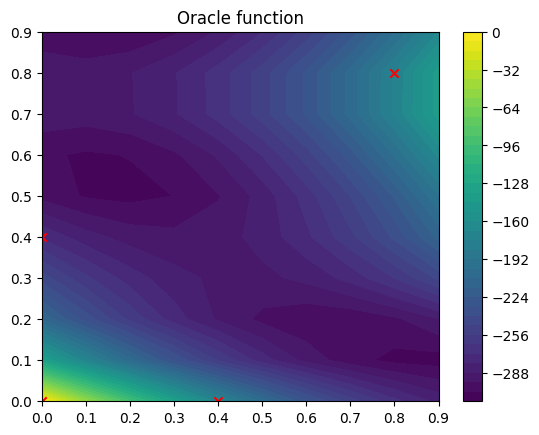

In [4]:
# Oracle
from gflownet.proxy.box.branin import Branin

oracle = Branin(fidelity=1, do_domain_map=True, device=device, float_precision=float_prec)

# testing oracle
print(oracle(baseline_states.to(device).clone() / grid_size))

# plot oracle function
plot_function(oracle, grid_flat.clone(), scatter_markers=baseline_states / grid_size)
plt.title("Oracle function")
plt.show()

tensor([-0.4285], device='cuda:0', dtype=torch.float64) tensor([0.1735], device='cuda:0', dtype=torch.float64)


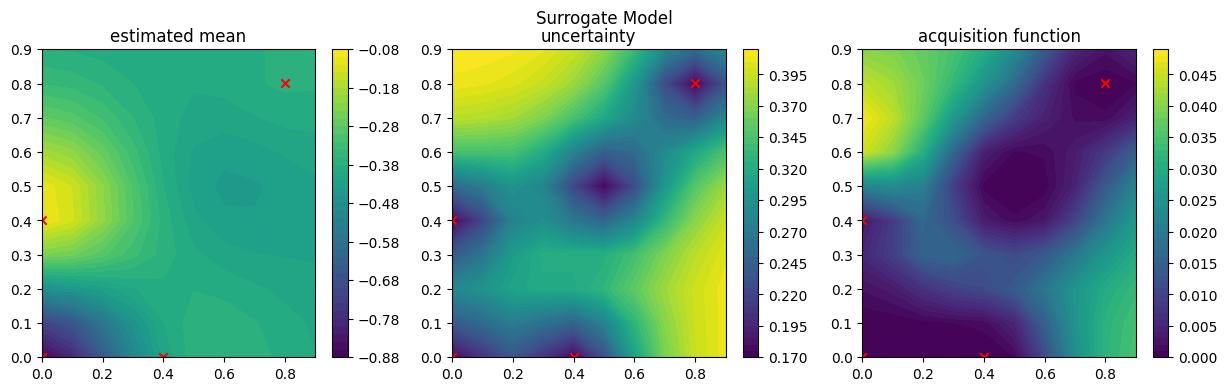

In [5]:
# Surrogate (e.g., Bayesian Optimization)
from surrogate.surrogate import SingleTaskGPRegressor

surrogate = SingleTaskGPRegressor(device=device, float_precision=float_prec, maximize=False)
train_data, test_data = dataset_handler.get_dataloader()
surrogate.fit(train_data)

# testing surrogate
preds_mean, preds_var = surrogate.get_predictions(test_states / grid_size)
print(preds_mean, preds_var)

# plot surrogate functions
fig, axes = plt.subplots(ncols=3, figsize=(15, 4))

plot_function(
    surrogate.get_predictions,
    grid_flat.clone(),
    fig=fig,
    ax=axes[0],
    scatter_markers=baseline_states / grid_size,
    output_index=0,
)
axes[0].set_title("estimated mean")

plot_function(
    surrogate.get_predictions,
    grid_flat.clone(),
    fig=fig,
    ax=axes[1],
    scatter_markers=baseline_states / grid_size,
    output_index=1,
)
axes[1].set_title("uncertainty")

plot_function(
    surrogate.get_acquisition_values,
    grid_flat.clone(),
    fig=fig,
    ax=axes[2],
    scatter_markers=baseline_states / grid_size,
)
axes[2].set_title("acquisition function")

fig.suptitle("Surrogate Model")
plt.show()

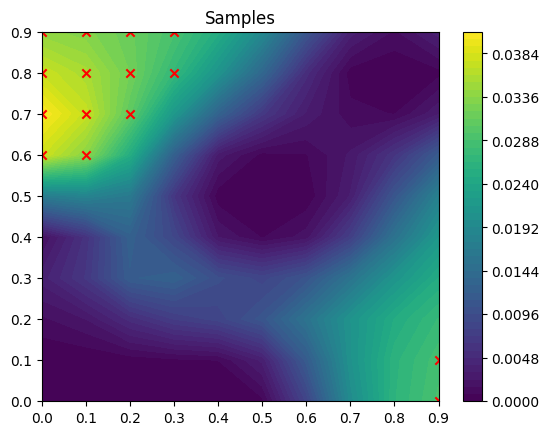

In [6]:
# Sampler (e.g., GFlowNet, or Random Sampler)
from sampler.sampler import GreedySampler, RandomSampler

sampler = GreedySampler(surrogate)
# sampler = RandomSampler(surrogate)
sampler.fit()
samples = sampler.get_samples(n_samples * 3, grid_flat.clone()).cpu()

# plot acq function with proposed candidates
fig, ax = plot_function(
    surrogate.get_acquisition_values, grid_flat.clone(), scatter_markers=samples
)
plt.title("Samples")
plt.show()

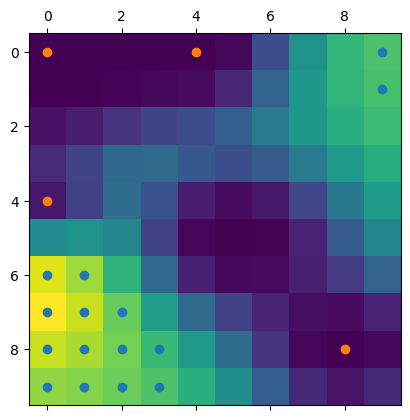

In [7]:
acq = surrogate.get_acquisition_values(grid_flat.clone()).detach().cpu()
plt.matshow(acq.reshape(int(len(acq) ** (1 / 2)), int(len(acq) ** (1 / 2))))
plt.scatter(samples.cpu()[:, 1] * grid_size, samples.cpu()[:, 0] * grid_size)
plt.scatter(baseline_states[:, 1].cpu(), baseline_states[:, 0].cpu())

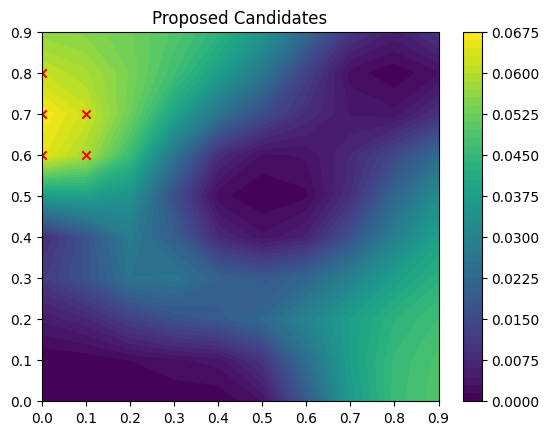

In [8]:
from filter.filter import Filter, ScoreFilter

filter = Filter()
# filter = OracleFilter(oracle)
filtered_samples = filter(n_samples, samples)

# plot oracle function with proposed candidates
fig, ax = plot_function(
    surrogate.get_acquisition_values,
    grid_flat.clone(),
    scatter_markers=filtered_samples.to("cpu"),
)
plt.title("Proposed Candidates")
plt.show()

# GFlowNet Sampler

In [9]:
import torch
float_prec = torch.float32
device = "cpu"
grid_size = 10

In [10]:
# dataset
from dataset.dataset import BraninDatasetHandler

dataset_handler = BraninDatasetHandler(
    grid_size=grid_size,
    train_path="./storage/branin/data_%i_train.csv" % grid_size,
    train_fraction=1.0,
    float_precision=float_prec,
)


In [11]:
train_data, _ = dataset_handler.get_dataloader()
for r in train_data:
    print(r)

[tensor([[0.0000, 0.4000],
        [0.0000, 0.0000],
        [0.4000, 0.0000],
        [0.8000, 0.8000]]), tensor([0.3749, 1.0000, 0.0000, 0.3611])]


In [12]:
from importlib import reload  # Python 3.4+
import surrogate.surrogate as surrogate

reload(surrogate)

from surrogate.surrogate import SingleTaskGPRegressor

surrogate = SingleTaskGPRegressor(device=device, float_precision=float_prec, maximize=False)
train_data, test_data = dataset_handler.get_dataloader()
surrogate.fit(train_data)

/home/mila/c/christina.humer/.conda/envs/al_new/lib/python3.10/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


In [16]:
# Load Hydra config in notebooks
# https://github.com/facebookresearch/hydra/blob/main/examples/jupyter_notebooks/compose_configs_in_notebook.ipynb
import os
from hydra import initialize_config_dir, compose
import hydra
from omegaconf import OmegaConf

abs_config_dir = os.path.abspath("config/")


In [17]:
with initialize_config_dir(version_base=None, config_dir=abs_config_dir):
    config_logger = compose(config_name="logger/wandb.yaml", overrides=[])
    # print(OmegaConf.to_yaml(env_config))
    print(config_logger)

logger = hydra.utils.instantiate(config_logger.logger, config_logger, _recursive_=False)

{'logger': {'_target_': 'gflownet.utils.logger.Logger', 'do': {'online': False, 'times': False}, 'project_name': 'GFlowNet', 'train': {'period': 1}, 'test': {'first_it': True, 'period': 100, 'n': 100, 'kde': {'bandwidth': 0.1, 'kernel': 'gaussian'}, 'n_top_k': 5000, 'top_k': 100, 'top_k_period': -1, 'n_trajs_logprobs': 10, 'logprobs_batch_size': 100, 'logprobs_bootstrap_size': 10000, 'max_data_logprobs': 100000.0}, 'oracle': {'period': 100000, 'k': [1, 10, 100]}, 'checkpoints': {'period': 1000}, 'logdir': {'root': './logs', 'ckpts': 'ckpts', 'overwrite': True}, 'debug': False, 'lightweight': False, 'progress': True, 'context': '0', 'notes': None, 'tags': ['gflownet']}}


In [15]:
with initialize_config_dir(version_base=None, config_dir=abs_config_dir):
    config_logger = compose(config_name="logger/wandb.yaml", overrides=[])
    # print(OmegaConf.to_yaml(env_config))
    print(config_logger)

# Logger
# from utils.logger import Logger

# logger = Logger(config=OmegaConf.create(), **config_logger)
logger = hydra.utils.instantiate(config_logger.logger, config_logger, _recursive_=False)

with initialize_config_dir(version_base=None, config_dir=abs_config_dir):
    config_sampler = compose(config_name="sampler/gflownet.yaml", overrides=[])
    # print(OmegaConf.to_yaml(config_sampler))
    print(config_sampler)

grid_env = hydra.utils.instantiate(
    config_sampler.sampler.conf.env,
    proxy=surrogate,
    device=device,
    float_precision=float_prec,
)

# The policy is used to model the probability of a forward/backward action
forward_policy = hydra.utils.instantiate(
    config_sampler.sampler.conf.policy.forward,
    env=grid_env,
    device=device,
    float_precision=float_prec,
)
backward_policy = hydra.utils.instantiate(
    config_sampler.sampler.conf.policy.backward,
    env=grid_env,
    device=device,
    float_precision=float_prec,
)

# State flow
if config_sampler.sampler.conf.state_flow is not None:
    state_flow = hydra.utils.instantiate(
        config_sampler.sampler.conf.state_flow,
        env=grid_env,
        device=device,
        float_precision=float_prec,
        base=forward_policy,
    )
else:
    state_flow = None

# GFlowNet Agent
sampler = hydra.utils.instantiate(
    config_sampler.sampler.conf.agent,
    device=device,
    float_precision=float_prec,
    env=grid_env,
    forward_policy=forward_policy,
    backward_policy=backward_policy,
    state_flow=state_flow,
    buffer=config_sampler.sampler.conf.env.buffer,
    logger=logger,
)

{'logger': {'_target_': 'gflownet.utils.logger.Logger', 'do': {'online': False, 'times': False}, 'project_name': 'GFlowNet', 'train': {'period': 1}, 'test': {'first_it': True, 'period': 100, 'n': 100, 'kde': {'bandwidth': 0.1, 'kernel': 'gaussian'}, 'n_top_k': 5000, 'top_k': 100, 'top_k_period': -1, 'n_trajs_logprobs': 10, 'logprobs_batch_size': 100, 'logprobs_bootstrap_size': 10000, 'max_data_logprobs': 100000.0}, 'oracle': {'period': 100000, 'k': [1, 10, 100]}, 'checkpoints': {'period': 1000}, 'logdir': {'root': './logs', 'ckpts': 'ckpts', 'overwrite': True}, 'debug': False, 'lightweight': False, 'progress': True, 'context': '0', 'notes': None, 'tags': ['gflownet']}}
{'sampler': {'conf': {'state_flow': None, 'policy': {'forward': {'_target_': 'gflownet.policy.base.Policy', 'config': {'type': 'mlp', 'n_hid': 128, 'n_layers': 2, 'checkpoint': None, 'reload_ckpt': False, 'is_model': False}}, 'backward': {'_target_': 'gflownet.policy.base.Policy', 'config': None}, 'shared': None}, 'env':

/home/mila/c/christina.humer/.conda/envs/al_new/lib/python3.10/site-packages/hydra/_internal/defaults_list.py:251: UserWarning: In 'sampler/gflownet.yaml': Defaults list is missing `_self_`. See https://hydra.cc/docs/1.2/upgrades/1.0_to_1.1/default_composition_order for more information
  warnings.warn(msg, UserWarning)



            Important: offline trajectories will NOT be sampled. In order to sample
            offline trajectories, the train configuration of the buffer should be
            complete and feasible and an output pkl file should be defined in
            env.buffer.train.output_pkl.
            

Constructing data set 
Test data
	Mean score: 0.021786538063499405
	Std score: 0.015443492875630887
	Min score: 0.0
	Max score: 0.04475913196802139


In [22]:
sampler.train()

  0%|          | 0/2000 [00:00<?, ?it/s]

Compute logprobs...
Sampling backward actions from test data to estimate logprobs...


Done computing logprobs


  0%|          | 0/100 [00:03<?, ?it/s]
/home/mila/c/christina.humer/.conda/envs/al_new/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/mila/c/christina.humer/.conda/envs/al_new/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
Loss: 1267.0955 | Mean rewards: 0.00 | JSD: 0.4480:   5%|▍         | 99/2000 [00:10<02:00, 15.75it/s] 

Compute logprobs...
Sampling backward actions from test data to estimate logprobs...


Done computing logprobs


  0%|          | 0/100 [00:03<?, ?it/s]
Loss: 566.4079 | Mean rewards: 0.00 | JSD: 0.4863:  10%|▉         | 197/2000 [00:21<02:17, 13.15it/s] 

Compute logprobs...
Sampling backward actions from test data to estimate logprobs...


Done computing logprobs


  0%|          | 0/100 [00:03<?, ?it/s]
Loss: 217.5760 | Mean rewards: 0.00 | JSD: 0.4857:  15%|█▍        | 298/2000 [00:31<01:54, 14.90it/s]

Compute logprobs...
Sampling backward actions from test data to estimate logprobs...


Done computing logprobs


  0%|          | 0/100 [00:03<?, ?it/s]
Loss: 75.5657 | Mean rewards: 0.00 | JSD: 0.4819:  20%|█▉        | 398/2000 [00:43<02:26, 10.93it/s] 

Compute logprobs...
Sampling backward actions from test data to estimate logprobs...


Done computing logprobs


  0%|          | 0/100 [00:03<?, ?it/s]
Loss: 22.4302 | Mean rewards: 0.00 | JSD: 0.4736:  25%|██▍       | 497/2000 [00:53<01:47, 13.96it/s]

Compute logprobs...
Sampling backward actions from test data to estimate logprobs...


Done computing logprobs


  0%|          | 0/100 [00:03<?, ?it/s]
Loss: 6.7583 | Mean rewards: 0.00 | JSD: 0.4414:  30%|██▉       | 598/2000 [01:04<01:39, 14.04it/s] 

Compute logprobs...
Sampling backward actions from test data to estimate logprobs...


Done computing logprobs


  0%|          | 0/100 [00:03<?, ?it/s]
Loss: 2.7254 | Mean rewards: 0.00 | JSD: 0.4417:  35%|███▍      | 699/2000 [01:15<02:10,  9.98it/s]

Compute logprobs...
Sampling backward actions from test data to estimate logprobs...


Done computing logprobs


  0%|          | 0/100 [00:03<?, ?it/s]
Loss: 1.9886 | Mean rewards: 0.00 | JSD: 0.4118:  40%|███▉      | 799/2000 [01:26<01:16, 15.62it/s]

Compute logprobs...
Sampling backward actions from test data to estimate logprobs...


Done computing logprobs


  0%|          | 0/100 [00:03<?, ?it/s]
Loss: 1.4535 | Mean rewards: 0.00 | JSD: 0.3518:  45%|████▍     | 899/2000 [01:38<01:13, 15.07it/s]

Compute logprobs...
Sampling backward actions from test data to estimate logprobs...


Done computing logprobs


  0%|          | 0/100 [00:03<?, ?it/s]
Loss: 1.0444 | Mean rewards: 0.00 | JSD: 0.2900:  50%|████▉     | 998/2000 [01:50<01:27, 11.44it/s]

Compute logprobs...
Sampling backward actions from test data to estimate logprobs...


Done computing logprobs


  0%|          | 0/100 [00:03<?, ?it/s]
Loss: 0.9461 | Mean rewards: 0.00 | JSD: 0.2765:  55%|█████▍    | 1099/2000 [02:02<01:15, 11.95it/s]

Compute logprobs...
Sampling backward actions from test data to estimate logprobs...


Done computing logprobs


  0%|          | 0/100 [00:03<?, ?it/s]
Loss: 0.8774 | Mean rewards: 0.00 | JSD: 0.2417:  60%|█████▉    | 1199/2000 [02:15<01:04, 12.48it/s]

Compute logprobs...
Sampling backward actions from test data to estimate logprobs...


Done computing logprobs


  0%|          | 0/100 [00:03<?, ?it/s]
Loss: 0.7211 | Mean rewards: 0.00 | JSD: 0.2304:  65%|██████▍   | 1298/2000 [02:27<00:53, 13.22it/s]

Compute logprobs...
Sampling backward actions from test data to estimate logprobs...


Done computing logprobs


  0%|          | 0/100 [00:03<?, ?it/s]
Loss: 0.6952 | Mean rewards: 0.00 | JSD: 0.2176:  70%|██████▉   | 1398/2000 [02:39<00:52, 11.57it/s]

Compute logprobs...
Sampling backward actions from test data to estimate logprobs...


Done computing logprobs


  0%|          | 0/100 [00:03<?, ?it/s]
Loss: 0.6248 | Mean rewards: 0.00 | JSD: 0.1933:  75%|███████▍  | 1499/2000 [02:51<00:34, 14.39it/s]

Compute logprobs...
Sampling backward actions from test data to estimate logprobs...


Done computing logprobs


  0%|          | 0/100 [00:03<?, ?it/s]
Loss: 0.4038 | Mean rewards: 0.00 | JSD: 0.2149:  80%|███████▉  | 1599/2000 [03:03<00:31, 12.73it/s]

Compute logprobs...
Sampling backward actions from test data to estimate logprobs...


Done computing logprobs


  0%|          | 0/100 [00:03<?, ?it/s]
Loss: 0.3274 | Mean rewards: 0.00 | JSD: 0.2172:  85%|████████▍ | 1698/2000 [03:16<00:23, 13.06it/s]

Compute logprobs...
Sampling backward actions from test data to estimate logprobs...


Done computing logprobs


  0%|          | 0/100 [00:03<?, ?it/s]
Loss: 0.2406 | Mean rewards: 0.00 | JSD: 0.1974:  90%|████████▉ | 1798/2000 [03:28<00:14, 14.28it/s]

Compute logprobs...
Sampling backward actions from test data to estimate logprobs...


Done computing logprobs


  0%|          | 0/100 [00:03<?, ?it/s]
Loss: 0.1768 | Mean rewards: 0.00 | JSD: 0.1754:  95%|█████████▍| 1898/2000 [03:41<00:09, 11.07it/s]

Compute logprobs...
Sampling backward actions from test data to estimate logprobs...


Done computing logprobs


  0%|          | 0/100 [00:03<?, ?it/s]
Loss: 0.1342 | Mean rewards: 0.00 | JSD: 0.1622: 100%|█████████▉| 1999/2000 [03:53<00:00, 12.17it/s]

Compute logprobs...
Sampling backward actions from test data to estimate logprobs...


Done computing logprobs


  0%|          | 0/100 [00:03<?, ?it/s]
Loss: 0.1342 | Mean rewards: 0.00 | JSD: 0.1831: 100%|██████████| 2000/2000 [03:57<00:00,  8.43it/s]


In [20]:
batch, times = sampler.sample_batch(n_forward=10, train=False)

In [21]:
batch.get_terminating_states(proxy=True)

tensor([[0.0000, 0.0000],
        [0.0000, 0.0000],
        [0.0000, 0.0000],
        [0.0000, 0.1111],
        [0.1111, 0.0000],
        [0.1111, 0.0000],
        [0.1111, 0.1111],
        [0.0000, 0.2222],
        [0.2222, 0.1111],
        [0.4444, 0.0000]])

In [ ]:
sampler

{'sampler': {'conf': {'state_flow': None, 'policy': {'forward': {'_target_': 'gflownet.policy.base.Policy', 'config': {'type': 'mlp', 'n_hid': 128, 'n_layers': 2, 'checkpoint': None, 'reload_ckpt': False, 'is_model': False}}, 'backward': {'_target_': 'gflownet.policy.base.Policy', 'config': None}, 'shared': None}, 'env': {'_target_': 'gflownet.envs.grid.Grid', 'id': 'grid', 'func': 'corners', 'n_dim': 2, 'length': 3, 'max_increment': 1, 'max_dim_per_action': 1, 'cell_min': -1, 'cell_max': 1, 'buffer': {'data_path': None, 'train': None, 'test': {'type': 'all', 'output_csv': 'grid_test.csv', 'output_pkl': 'grid_test.pkl'}}, 'reward_func': 'identity', 'reward_min': 1e-08, 'reward_beta': 1.0, 'reward_norm': 1.0, 'reward_norm_std_mult': 0.0, 'proxy_state_format': 'oracle', 'skip_mask_check': False, 'conditional': False, 'continuous': False}, 'agent': {'_target_': 'gflownet.gflownet.GFlowNetAgent', 'seed': 0, 'optimizer': {'z_dim': 16, 'loss': 'trajectorybalance', 'lr': 0.0001, 'lr_decay_per

/home/mila/c/christina.humer/.conda/envs/al_new/lib/python3.10/site-packages/hydra/_internal/defaults_list.py:251: UserWarning: In 'sampler/gflownet.yaml': Defaults list is missing `_self_`. See https://hydra.cc/docs/1.2/upgrades/1.0_to_1.1/default_composition_order for more information
  warnings.warn(msg, UserWarning)


In [8]:
with initialize_config_dir(version_base=None, config_dir=abs_config_dir):
    config_sampler = compose(config_name="sampler/gflownet.yaml", overrides=[])
    # print(OmegaConf.to_yaml(config_sampler))
    print(config_sampler)
    
sampler = hydra.utils.instantiate(
    config_sampler.sampler,
    surrogate=surrogate,
    logger=logger,
    device=device,
    float_precision=float_prec,
)


init
grid_env
forward_policy
backward_policy
state_flow

            Important: offline trajectories will NOT be sampled. In order to sample
            offline trajectories, the train configuration of the buffer should be
            complete and feasible and an output pkl file should be defined in
            env.buffer.train.output_pkl.
            

Constructing data set 
Test data
	Mean score: 0.1279197929739995
	Std score: 0.049022623362086445
	Min score: 4.1038751987798605e-06
	Max score: 0.15595106780529022


In [ ]:
samples = sampler.get_samples(n_samples * 3, grid_flat.clone()).cpu()

# plot acq function with proposed candidates
fig, ax = plot_function(
    surrogate.get_acquisition_values, grid_flat.clone(), scatter_markers=samples
)
plt.title("Samples")
plt.show()

In [15]:
from sampler.sampler import GFlowNetSampler

sampler = GFlowNetSampler(surrogate, config_sampler, logger, device, float_prec)


            Important: offline trajectories will NOT be sampled. In order to sample
            offline trajectories, the train configuration of the buffer should be
            complete and feasible and an output pkl file should be defined in
            env.buffer.train.output_pkl.
            

Constructing data set 
Test data
	Mean score: 0.12163516696963622
	Std score: 0.046829605458979205
	Min score: 4.2319362592024845e-07
	Max score: 0.1491968184709549


In [ ]:

# Logger
# from utils.logger import Logger

# logger = Logger(config=OmegaConf.create(), **config_logger)

In [ ]:
from gflownet.envs.grid import Grid as GFlowNetGridEnv

grid_env = GFlowNetGridEnv(
    n_dim=2,
    length=grid_size,
    max_increment=1,
    max_dim_per_action=1,
    cell_min=0,
    cell_max=1,
    proxy=surrogate,
    reward_func="identity",
)

In [28]:
# Load Hydra config in notebooks
# https://github.com/facebookresearch/hydra/blob/main/examples/jupyter_notebooks/compose_configs_in_notebook.ipynb
import os
from hydra import initialize_config_dir, compose
import hydra
from omegaconf import OmegaConf

abs_config_dir = os.path.abspath("config/")
with initialize_config_dir(version_base=None, config_dir=abs_config_dir):
    config_gflownet = compose(config_name="gflownet.yaml", overrides=[])
    # print(OmegaConf.to_yaml(env_config))
    print(config_gflownet)

# GFlowNetAgent
from gflownet.policy.base import Policy
from gflownet.gflownet import GFlowNetAgent

forward_policy = Policy(
    config_gflownet.policy.forward,
    env=grid_env,
    device=device,
    float_precision=torch.double,
)

backward_policy = Policy(
    config_gflownet.policy.backward,
    env=grid_env,
    device=device,
    float_precision=torch.double,
)

sampler = GFlowNetAgent(
    grid_env,
    device=device,
    float_precision=torch.double,
    forward_policy=forward_policy,
    backward_policy=backward_policy,
    logger=logger,
    **config_gflownet
)

{'seed': 0, 'optimizer': {'z_dim': 16, 'loss': 'trajectorybalance', 'lr': 0.0001, 'lr_decay_period': 1000000, 'lr_decay_gamma': 0.5, 'lr_z_mult': 100, 'method': 'adam', 'early_stopping': 0.0, 'ema_alpha': 0.5, 'adam_beta1': 0.9, 'adam_beta2': 0.999, 'sgd_momentum': 0.9, 'batch_size': {'forward': 10, 'backward_dataset': 0, 'backward_replay': 0}, 'train_to_sample_ratio': 1, 'n_train_steps': 5000, 'bootstrap_tau': 0.0, 'clip_grad_norm': 0.0}, 'state_flow': None, 'batch_reward': True, 'mask_invalid_actions': True, 'temperature_logits': 1.0, 'random_action_prob': 0.0, 'pct_offline': 0.0, 'replay_capacity': 0, 'replay_sampling': 'permutation', 'train_sampling': 'permutation', 'num_empirical_loss': 200000, 'oracle': {'n': 500}, 'sample_only': False, 'active_learning': False, 'buffer': {'train': {'path': None, 'n': None, 'type': None, 'seed': None, 'output_csv': None}, 'test': {'path': None, 'type': 'all', 'output_pkl': 'buffer_data_test.csv', 'n': None, 'seed': None, 'output_csv': None}}, 'po

In [29]:
sampler.train()

  0%|          | 0/5000 [00:00<?, ?it/s]

Compute logprobs...
Sampling backward actions from test data to estimate logprobs...



  0%|          | 0/5000 [00:03<?, ?it/s]


RuntimeError: index_add_(): self (Double) and source (Float) must have the same scalar type

In [115]:
from gflownet.utils.batch import Batch
batch = Batch(env=grid_env, device=device, float_type=float_prec)

In [116]:
# Make indices of batch consecutive since they are used for indexing here
# Get necessary tensors from batch
states_policy = batch.get_states(policy=True)
states = batch.get_states(policy=False)
actions = batch.get_actions()
parents_policy = batch.get_parents(policy=True)
parents = batch.get_parents(policy=False)
traj_indices = batch.get_trajectory_indices(consecutive=True)
# Forward trajectories
masks_f = batch.get_masks_forward(of_parents=True)
policy_output_f = forward_policy(parents_policy)

IndexError: list index out of range

In [11]:
# # environment
# import config
# train = config.env.BufferSpec(
#     path="~/scratch/datasets/grid/corners_d2l3_r0.csv",
#     seed=167,
#     n=1000,
# )
# test = config.env.BufferSpec(
#     path="~/scratch/datasets/grid/corners_d2l3_r0.csv",
#     seed=167,
#     n=1000,
# )
# buffer = config.env.Buffer(train=train, test=test)
# config_env = config.env.Grid_Env(
#     buffer,
#     min_step_len=1,
#     max_step_len=1,
#     cell_min=-1,
#     cell_max=1
# )

# from environment.grid_env import GridEnv
# env = GridEnv(**config_env.__dict__)